# Procesos Estocásticos I

Recordemos que dado $(\Omega, \mathcal{f}, \mathbb{P})$ un espacio de probabilidad, $T$ un conjunto y $S \subseteq \mathbb{R}$, un proceso estocástico es una función $\textbf{X} : \Omega \times T \longrightarrow S$ tal que para cada $t \in T$, $X_t = \textbf{X} : \Omega \times \{t\} \longrightarrow S$ es una variable aleatoria en el mismo espacio de probabilidad. Denotamos al proceso por $\{X_t\}_{t \in T}$. En este documento se dan algunos ejemplos de procesos estocásticos comunes, acompañados de simulaciones.

### 1. Proceso a Ensayos Independientes
Supongamos que eres un corredor y quieres llevar una cuenta de cuánto corres en cierto número de días. Para esto, defines la variable aleatoria $X_n$ como:
$$
X_n =
\begin{cases}
1 & \text{si corres el día n }  \\
0 & \text{si no corres el día n }  \\
\end{cases}
$$

Si suponemos que correr es equiprobable independientemente del día y de si has corrido o no y definiendo $p = \mathbb{P}[\text{Correr}]$, entonces tenemos que $\{X_n\}_{n\in \mathbb{N}}$ es una sucesión de variables aleatorias independientes Bernoulli de parámetro p, que es un **proceso estocástico a ensayos independientes**, donde $T_X = \mathbb{N}$ y $S_X = \{0,1\}$.

Ahora veamos cómo simular procesos de este tipo.


In [ ]:
import numpy as np

np.random.seed(13)
n = 30
p = 0.75

# Generar 30 v.a. bin(p)
xp = np.random.binomial(n=1, p=p, size=n)

# generamos la v.a. binomial asociada
yp = np.cumsum(xp)

print("He corrido los días:", xp)


He corrido los días: [0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1]


Para investigar cuántas veces corriste hasta el enésimo día, defines la variable aleatoria $Y_n = \sum_{i=1}^{n}X_i$. Es claro que $Y_n$ indica el número de días que corriste hasta el enésimo. De los cursos de probabilidad tenemos que $Y_n \sim Bin(n, p)$, el cual también es un proceso estocástico, pero $\textbf{no}$ es a ensayos independientes, pues siempre pasa que $Y_{n}$ no es independiente de $Y_k$ para todo $k \leq n$. Para este proceso, $T_Y = \mathbb{N}$ y $S_Y = \mathbb{N}$.

In [ ]:
yp = np.cumsum(xp)

print(f"En total, hasta el día {n} he corrido {yp[-1]} veces.")

En total, hasta el día 30 he corrido 21 veces.


In [ ]:
len(xp) == len(yp)

True

#### ¿Cómo visualizamos procesos estocásticos?

Haremos un gráfico donde el eje $x$ será el espacio parámetral y el eje $y$ será el espacio de estados.

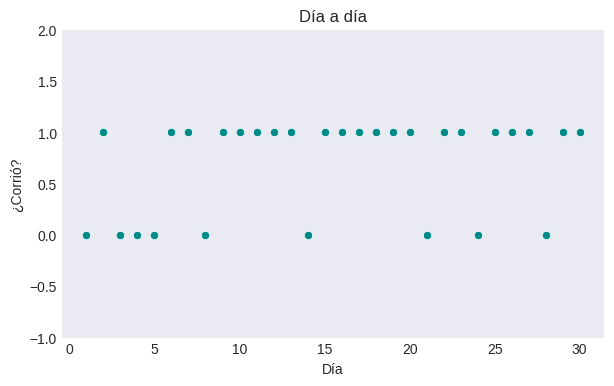

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un DataFrame con Pandas
datos_xp = pd.DataFrame({
    'x': np.arange(1, len(xp) + 1),
    'y': xp
})

# Graficamos
plt.figure(figsize=(7,4))
plt.style.use('seaborn-v0_8-dark')
plt.grid()
sns.scatterplot(data=datos_xp, x='x', y='y', color='darkcyan')
plt.ylim(-1, 2)
plt.title("Día a día")
plt.grid()
plt.xlabel("Día")
plt.ylabel("¿Corrió?")
plt.show()

Sin embargo, el proceso $\{Y_n\}_{n\in \mathbb{N}}$ tiene una representación visual más divertida:

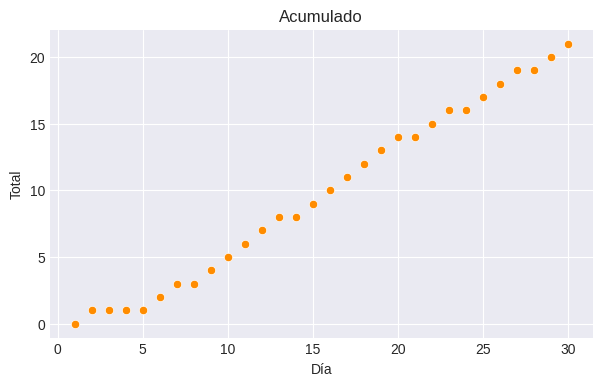

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos el DataFrame
datos_yp = pd.DataFrame({
    'x': np.arange(1, len(yp) + 1),
    'y': yp
})


# Graficamos
plt.figure(figsize=(7, 4))
plt.style.use('seaborn-v0_8-dark')
sns.scatterplot(data=datos_yp, x='x', y='y', color='darkorange')
plt.title("Acumulado")
plt.grid()
plt.xlabel("Día")
plt.ylabel("Total")
plt.show()


Podemos variar la probabilidad $p$ y ver cómo se afecta el proceso. Esto nos da información valiosa sobre su comportamiento.


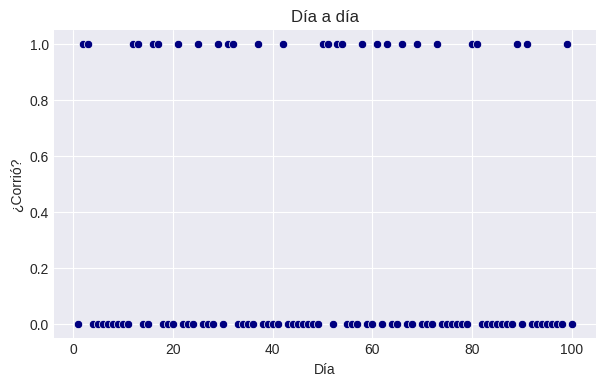

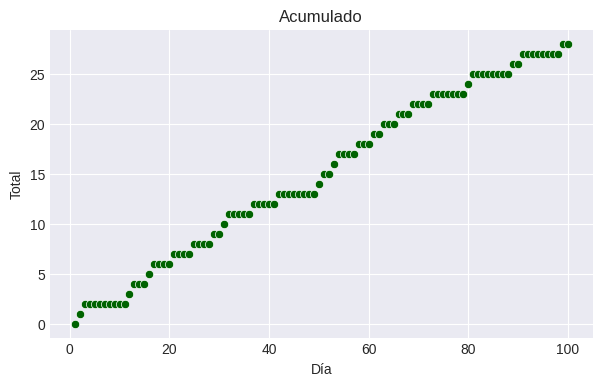

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para generar los procesos
def procesosxy(n, p):
    xpr = np.random.binomial(n=1, p=p, size=n)
    ypr = np.cumsum(xpr)
    return pd.DataFrame({'x': xpr, 'y': ypr})

# Función para visualizar
def visualizador_xy(n, p):
    pro1 = procesosxy(n, p)
    datospro1 = pd.DataFrame({
        'x': pro1['x'],
        'y': pro1['y'],
        't': np.arange(1, len(pro1) + 1)
    })

    # Primer gráfico: Día a día
    plt.figure(figsize=(7, 4))
    plt.style.use('seaborn-v0_8-dark')
    plot1 = sns.scatterplot(data=datospro1, x='t', y='x', color='navy')
    plt.title('Día a día')
    plt.grid()
    plt.xlabel('Día')
    plt.ylabel('¿Corrió?')
    plt.show()

    # Segundo gráfico: Acumulado
    plt.figure(figsize=(7, 4))
    plot2 = sns.scatterplot(data=datospro1, x='t', y='y', color='darkgreen')
    plt.title('Acumulado')
    plt.grid()
    plt.xlabel('Día')
    plt.ylabel('Total')
    plt.show()

# Fijamos la semilla
np.random.seed(23)

# Llamamos la función
visualizador_xy(100, 0.3)


### 2. Caminata Aleatoria en $\mathbb{Z}$

¿Qué pasa ahora si hacemos que la densidad de $\{X_n\}_{n\in \mathbb{N}}$ sea:

$$
\mathbb{P}[X_n = j] =
\begin{cases}
p & \text{si } j = 1 \\
1-p & \text{si } j = -1 \\
0 & \text{e.o.c.}
\end{cases}
$$

Entonces si definimos una nueva variable aleatoria como $Y_n = \sum_{i=1}^nX_i$, tenemos que el proceso $\{Y_n\}_{n \in \mathbb{N}}$ es una **caminata aleatoria simple**.

Observa que este proceso es casi idéntico al anterior, pero aquí las variables aleatorias toman los valores 1 y -1. El caso anterior es un caso particular de una caminata aleatoria.

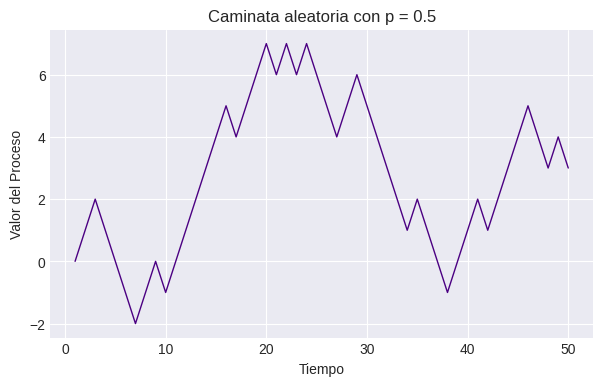

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros iniciales
caminata_aleatoria = [0]  # 0 es la Posición inicial
N = 50  # Número de pasos
p = 0.5  # Probabilidad de avanzar

# Función para simular
for i in range(1, N):
    b = np.random.choice([-1, 1], p=[1 - p, p])  # Escoge aleatoriamente avanzar o retroceder
    caminata_aleatoria.append(caminata_aleatoria[-1] + b)

# Creamos un DataFrame para los datos
data = pd.DataFrame({'t': np.arange(1, N + 1), 'c': caminata_aleatoria})

# Graficar
plt.figure(figsize=(7, 4))
plt.style.use('seaborn-v0_8-dark')
plt.plot(data['t'], data['c'], color='indigo', linewidth=1)
plt.title('Caminata aleatoria con p = 0.5')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Proceso')
plt.grid(True)
plt.show()

Solemos graficar los procesos como gráficas de línes, pues permiten visualizar de forma clara y continua la evolución con el tiempo. Es posible identificar tendencias, fluctuaciones, comportamientos extremos y comparar trayectorias del proceso.

Continuando con la caminata aleatoria, haremos experimentos variando el número de iteraciones y el valor de la probabilidad $p$

Ahora usaremos clases de Python para definir una caminata aleatoria y poder usarla como un objeto y que sea más fácil variar los parámetros.

In [ ]:
class CaminataAleatoria:

  # Definimos los datos iniciales
  def __init__(self, N, p, k_0):
    self.k_0 = k_0
    self.N = N
    self.p = p
    self.caminata_aleatoria = [k_0]

  # Función para simular la caminata
  def simular(self):
    for i in range(1, self.N):
        b = np.random.choice([-1, 1], p=[1 - self.p, self.p])
        self.caminata_aleatoria.append(self.caminata_aleatoria[-1] + b)
    return True

  # Función para imprimir la cadena
  def __str__(self):
    return str(self.caminata_aleatoria)

  # Función para graficar la cadena
  def plot(self):
    plt.style.use('seaborn-v0_8-dark')
    data = pd.DataFrame({'t': np.arange(1, self.N + 1), 'c': self.caminata_aleatoria})
    plt.figure(figsize=(7, 4))
    plt.plot(data['t'], data['c'], color='black', linewidth=1)
    plt.grid()
    plt.title(f'Caminata aleatoria con p = {self.p}', fontsize=16)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Valor del Proceso', fontsize=12)
    plt.show()


Cuando $p = \frac{1}{2}$ decimos que la caminata aleatoria es simple y simétrica. Veamos un ejemplo.

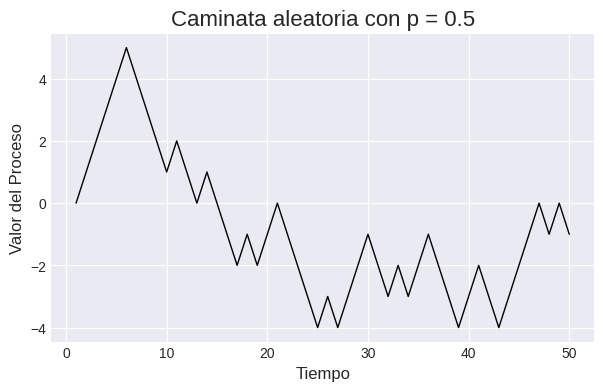

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Caminta aleatoria simple simétrica
ca1 = CaminataAleatoria(N=50, p=0.5, k_0=0)
ca1.simular()
ca1.plot()

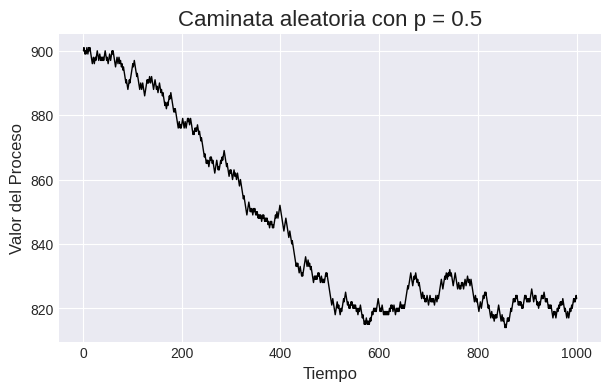

In [ ]:
# Caminata con proba de transición 1/2 y empezando en 900 con 1000 pasos
ca2 = CaminataAleatoria(1000, p=0.5, k_0=900)
ca2.simular()
ca2.plot()

Sabemos que para el proceso $\{Y_n\}_{n \in \mathbb{N}}$ cumple que:

* $\mathbb{E}(Y_n) = n(2p-1)$

¿Cómo podemos describir al proceso en términos de su esperanza? Veamos los siguientes ejemplos:

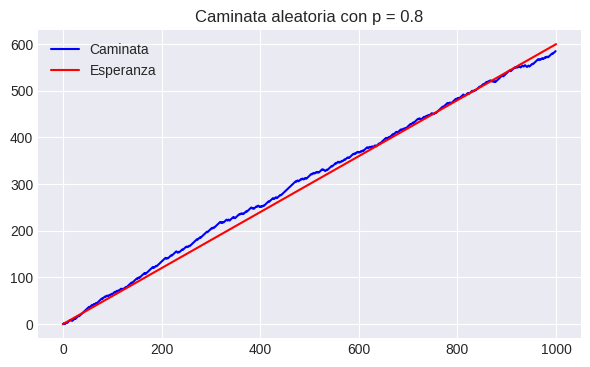

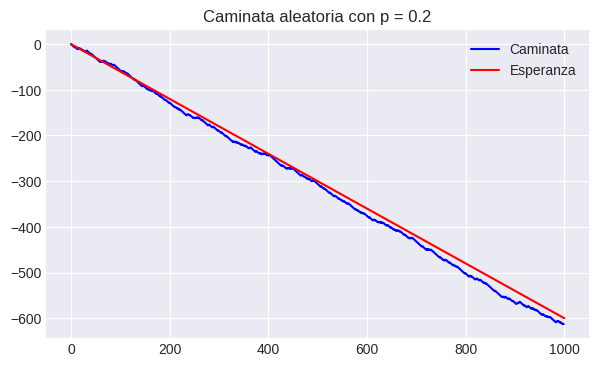

In [ ]:
# Caminata con p = 0.8
import numpy as np
cm3 = CaminataAleatoria(1000, p=0.8, k_0=0)
cm3.simular()
plt.figure(figsize=(7, 4))
plt.style.use('seaborn-v0_8-dark')
plt.plot(cm3.caminata_aleatoria, color = 'blue', label = 'Caminata')
plt.title('Caminata aleatoria con p = 0.8')
plt.plot(np.linspace(0,1000,100000), np.linspace(0,1000,100000)*(2*0.8-1), color = 'red', label = 'Esperanza')
plt.legend()
plt.grid()
plt.show()

# Caminta con p = 0.2
cm4 = CaminataAleatoria(1000, p=0.2, k_0=0)
cm4.simular()
plt.figure(figsize=(7, 4))
plt.style.use('seaborn-v0_8-dark')
plt.plot(cm4.caminata_aleatoria, color = 'blue', label = 'Caminata')
plt.title('Caminata aleatoria con p = 0.2')
plt.plot(np.linspace(0,1000,100000), np.linspace(0,1000,100000)*(2*0.2-1), color = 'red', label = 'Esperanza')
plt.legend()
plt.grid()
plt.show()


Como podemos ver, en el primer caso $p > 1-p$ y resulta que en media nos alejamos positivamente más del punto inicial cada vez, lo cual puede verse en la gráfica. El caso contrario se da en el segundo caso, pues aquí $p < 1-p$ y nos alejamos hacia los negativos cada vez más.

Notemos lo siguiente:


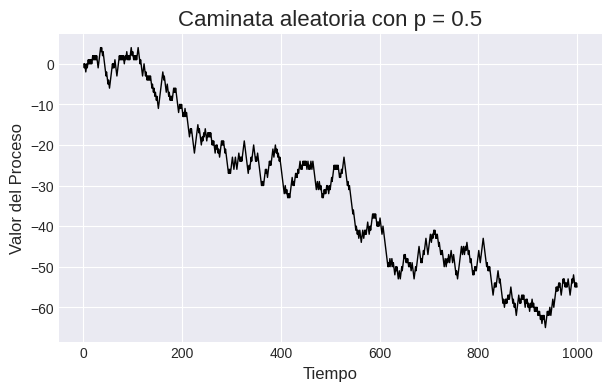

In [ ]:
sim = CaminataAleatoria(1000, p=0.5, k_0=0)
sim.simular()
sim.plot()

Cuando la caminata es simétrica y arrancamos desde el $0$, se tiene que para cada $n$, $\mathbb{E}(X_n) = 0$, entonces en promedio permanecemos en la posición inicial. Esto tiene sentido, pues tienes la misma probabilidad de "bajar" que de "subir".

Ejercicio: Simula una caminata aleatoria simétrica pero con diferente punto de inicio. En ese caso, ¿qué pasa con la esperanza?